In [2]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

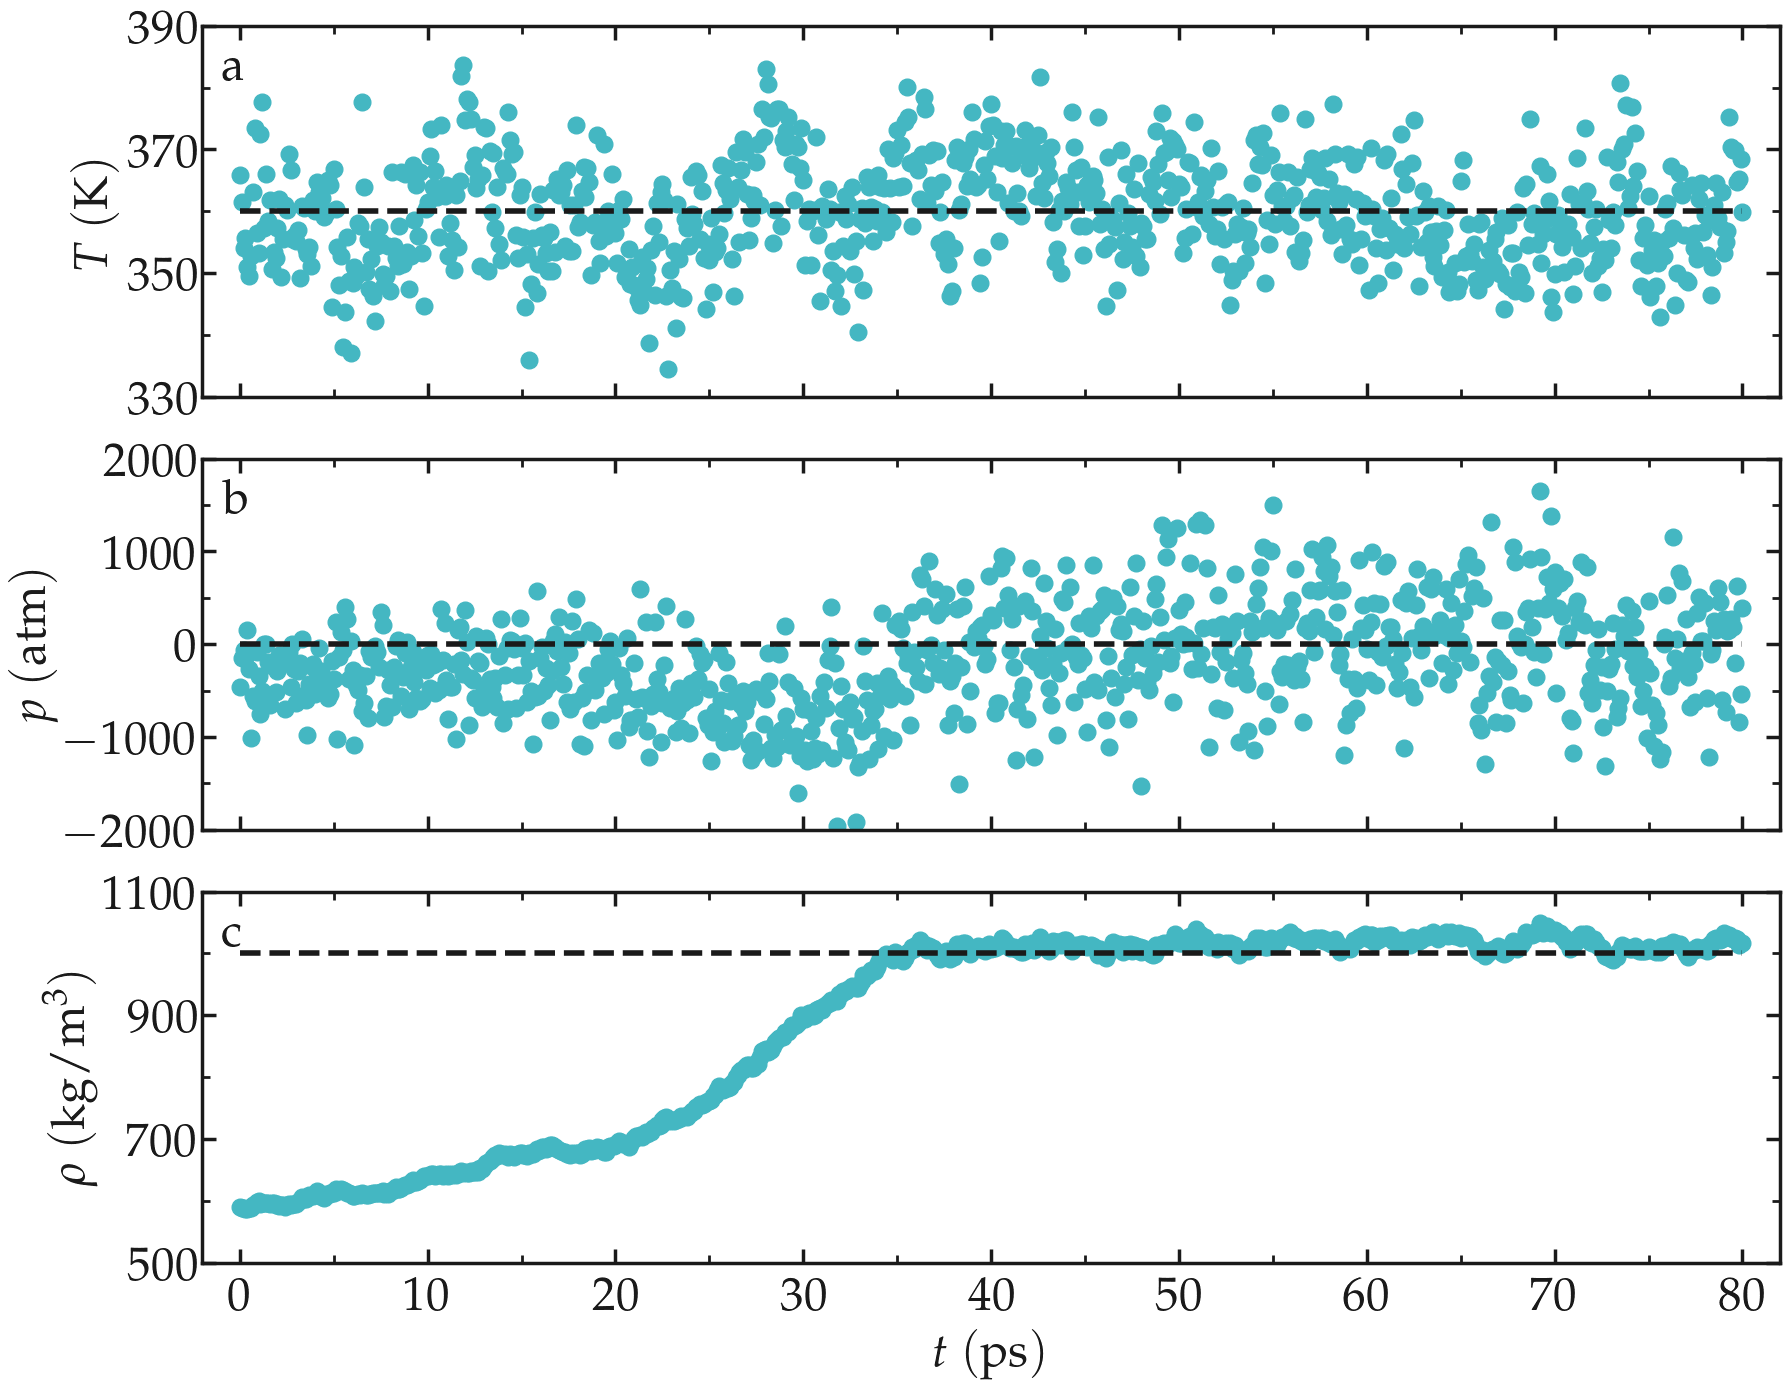

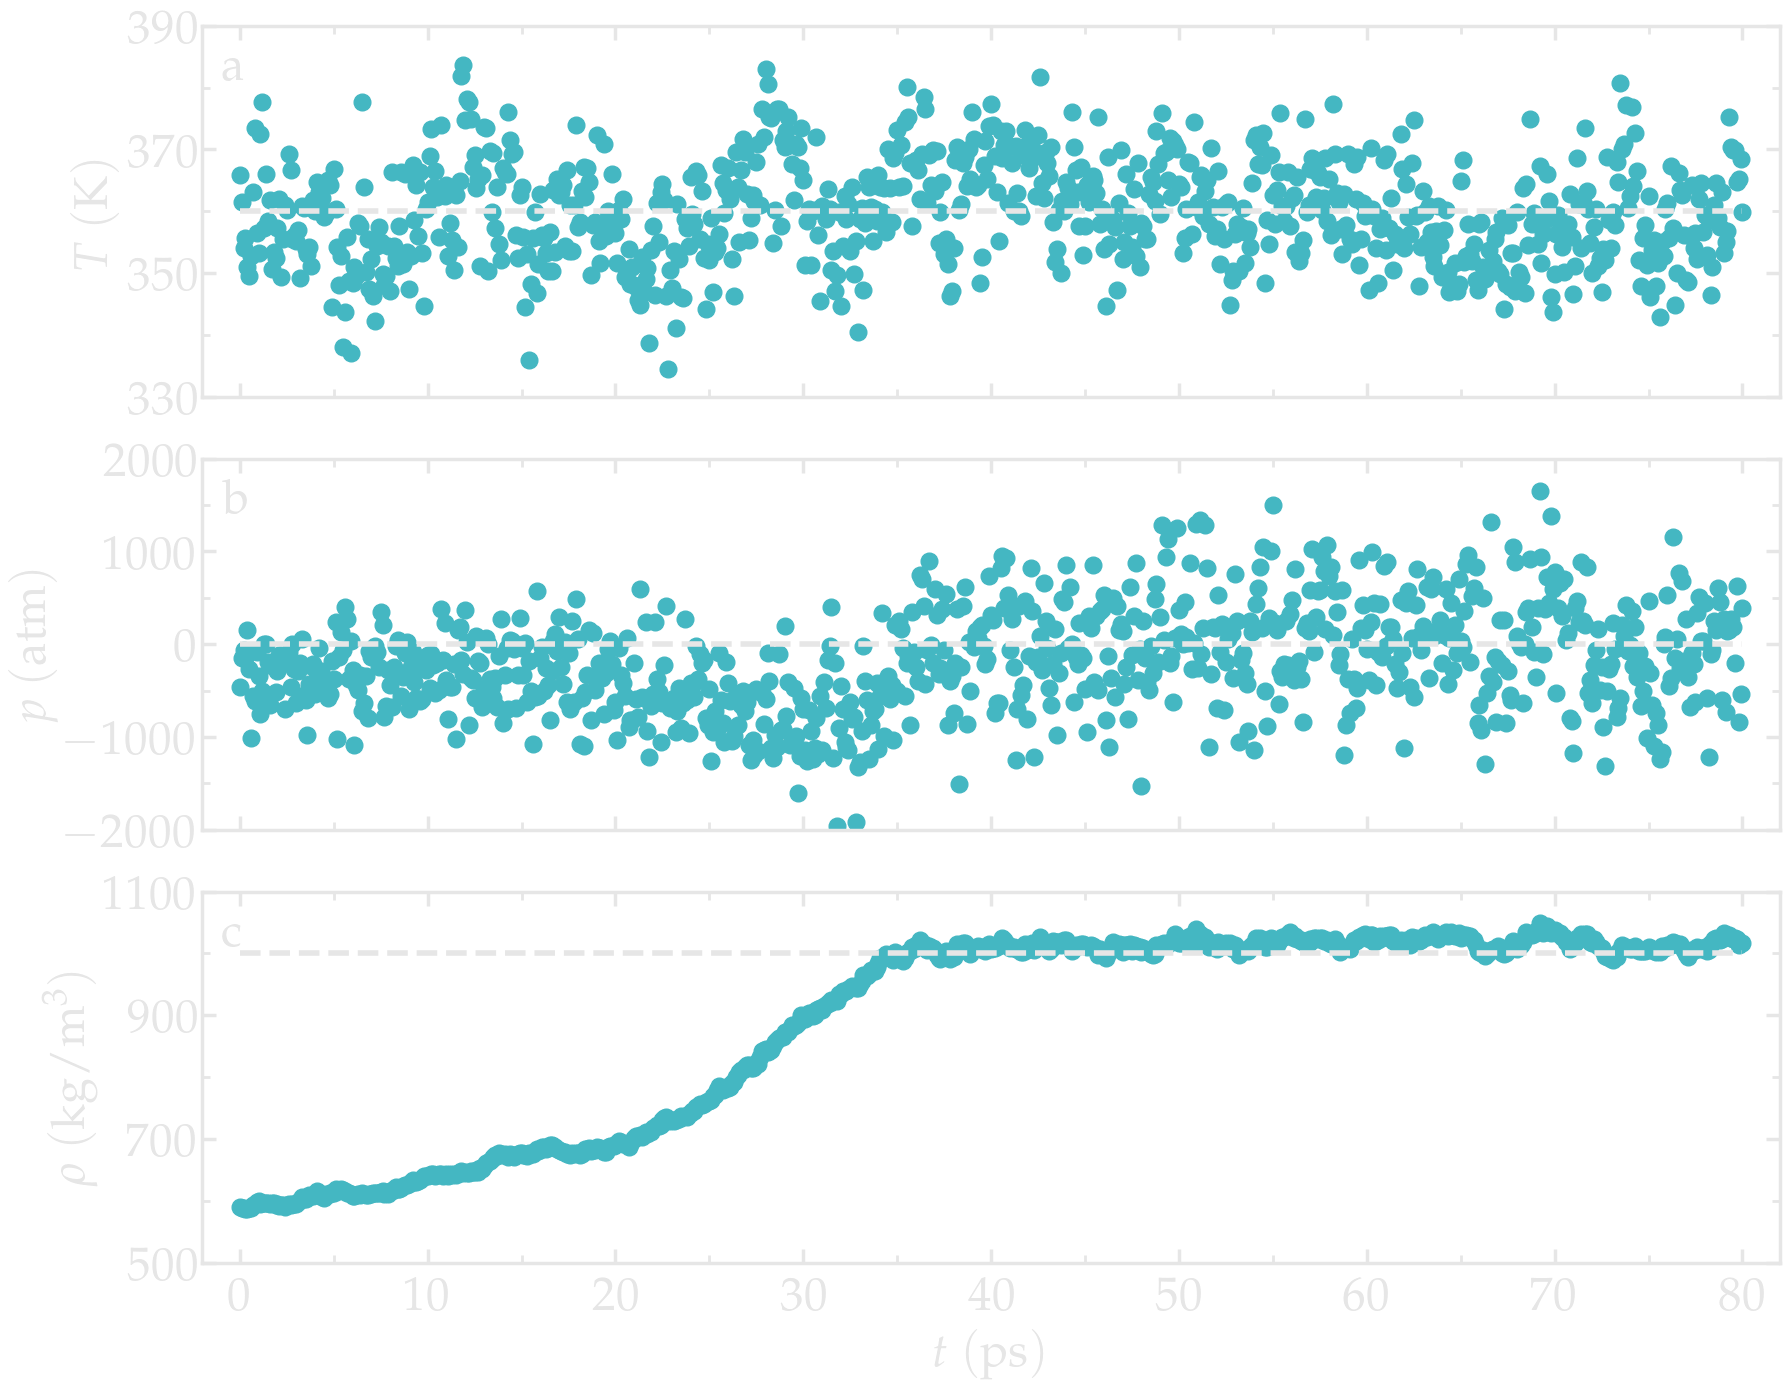

In [11]:
filename = "temperature-npt"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,14))
    ax, n, l_tot, c_tot = [], 0, 3, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, temp = np.loadtxt("temperature-npt.xvg", skiprows=24).T
    ax[-1].plot(t, temp, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    ax[-1].plot(t, t*0+360, "--", color=mygray,
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$T ~ \mathrm{(K)}$',
                   xpad=10, legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(-2, 82), y_boundaries=(330, 390),
                   y_ticks=np.arange(330, 391, 20))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, temp = np.loadtxt("pressure-npt.xvg", skiprows=24).T
    ax[-1].plot(t, temp, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    ax[-1].plot(t, t*0+1, "--", color=mygray,
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$p ~ \mathrm{(atm)}$',
                   xpad=10, legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(-2, 82), y_boundaries=(-2000, 2000),
                   y_ticks=np.arange(-2000, 2001, 1000)) 
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, temp = np.loadtxt("density-npt.xvg", skiprows=24).T
    ax[-1].plot(t, temp, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    ax[-1].plot(t, t*0+1000, "--", color=mygray,
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$t ~ (\textrm{ps})$', r'$\rho ~ (\mathrm{kg}/\textrm{m}^3)$',
                   xpad=10, legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(-2, 82), y_boundaries=(500, 1100),
                   y_ticks=np.arange(500, 1101, 200)) 
    add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$", r"$\textrm{c}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)